# Set up + Merge DataFrames

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode
from statistics import mean
from statistics import median

import collections

In [2]:
# pull in the hulu csv as df

hulu_path = "/Users/emilyye/Downloads/hulu_titles.csv"

hulu_data = pd.read_csv(hulu_path)

In [3]:
# the original csv file categorizes some duration/runtime values into the Ratings column. Reassign them to the appropriate rows in the duration/runtime column.

for index, element in enumerate(hulu_data['rating']):
    if 'min' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'
    if 'Seasons' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'
    if 'Season' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'


In [4]:
# pull in the general streaming show data as dfs

gen_path_one = "/Users/emilyye/Downloads/tv_shows.csv"

gen_path_two = "/Users/emilyye/Downloads/MoviesOnStreamingPlatforms_updated.csv"

gen_data_one = pd.read_csv(gen_path_one)
gen_data_two = pd.read_csv(gen_path_two)


In [5]:
#merge the three dataframes into one
gen_master = pd.merge(gen_data_one, gen_data_two, on = "Title", how="outer")

hulu_data = hulu_data.rename(columns = {"title":"Title"})

master_db = pd.merge(gen_master, hulu_data, on = "Title", how = "outer")

# remove unnecessary columns (as agreed upon with project group)
del master_db["Unnamed: 0_x"]
del master_db["ID_x"]

del master_db["Unnamed: 0_y"]
del master_db["show_id"]
del master_db["cast"]


# create a dataframe from the master that is exclusive to Hulu

hulu_x = master_db.loc[master_db["Hulu_x"] == 1.0]
hulu_y = master_db.loc[master_db["Hulu_y"] == 1.0]

hulu_merge = pd.merge(hulu_x, hulu_y, on="Title", how = "outer")

# format so that all values are strings
hulu_merge = hulu_merge.astype("string")
hulu_merge = hulu_merge.fillna(value="NaN")

gen_master

,Unnamed: 0_x,ID_x,Title,Year_x,Age_x,IMDb_x,Rotten Tomatoes_x,Netflix_x,Hulu_x,Prime Video_x,...,Netflix_y,Hulu_y,Prime Video_y,Disney+_y,Type_y,Directors,Genres,Country,Language,Runtime
0,0.0,1.0,Breaking Bad,2008.0,18+,9.4/10,100/100,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,2.0,Stranger Things,2016.0,16+,8.7/10,96/100,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,3.0,Attack on Titan,2013.0,18+,9.0/10,95/100,1.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,4.0,Better Call Saul,2015.0,18+,8.8/10,94/100,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,5.0,Dark,2017.0,16+,8.8/10,93/100,1.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14878,NaN,NaN,Most Wanted Sharks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,"Crime,Reality-TV",United States,"Greek,English",NaN
14879,NaN,NaN,Doc McStuffins: The Doc Is In,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,Chris Anthony Hamilton,Animation,United States,English,23.0
14880,NaN,NaN,Ultimate Viking Sword,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,NaN,NaN,United States,NaN,NaN
14881,NaN,NaN,Hunt for the Abominable Snowman,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,1.0,0.0,Dan Oliver,"Drama,History",NaN,NaN,NaN


In [6]:
def clean_columns(df, final_col, other_col):
    '''
    merge columns such that all possible non-null values across similar columns are consolidated into a single column
        df is the dataframe being used
        final_col is the main column
        other_col are the other similar columns from which to pull viable values to replace nulls in the main
    '''
    
    x = 0
    
    for x in range(len(df)):
       
        if df[final_col][x] == "NaN":
            df[final_col][x] = df[other_col[0]][x]
            try: 
                if df[other_col[0]][x] == "NaN":
                    df[final_col][x] == df[other_col[1]][x]
                    if (df[(other_col[1])][x] == "NaN"):
                        df[final_col][x] == df[(other_col[2])][x]
                        if (df[(other_col[2])][x] == "NaN"):
                            try: 
                                df[final_col][x] = df[(other_col[3])][x]
                                if (df[(other_col[3])][x] == "NaN"):
                                    try: 
                                        df[final_col][x] = df[(other_col[4])][x]
                                    except:
                                        df[final_col][x] = df[(other_col[3])][x]
                            except:
                                df[final_col][x] == df[(other_col[2])][x]
            except:
                df[final_col][x] = df[other_col[0]][x]
                        
    return df[final_col]

In [7]:
# repeat for other groups of similar columns
hulu_merge["Type (Clean)"] = clean_columns(hulu_merge, "type_x", ["type_y","Type_y_x","Type_x_x","Type_y_x"])

hulu_merge["Director"] = clean_columns(hulu_merge, "Directors_x",["director_x","Directors_y","director_y"])

hulu_merge["Country"] = clean_columns(hulu_merge, "Country_x",["country_x","country_y","Country_y"])

hulu_merge["Rotten Tomatoes"] = clean_columns(hulu_merge, "Rotten Tomatoes_x_x",["Rotten Tomatoes_x_y","Rotten Tomatoes_y_x","Rotten Tomatoes_y_y"])

hulu_merge["IMDB"] = clean_columns(hulu_merge, "IMDb_x_x",["IMDb_y_x","IMDb_x_y","IMDb_y_y"])

hulu_merge["Age"] = clean_columns(hulu_merge, "Age_x_x",["Age_x_y","Age_y_y","Age_y_x"])

hulu_merge["Netflix"] = clean_columns(hulu_merge, "Netflix_x_x",["Netflix_x_y","Netflix_y_x","Netflix_y_y"])

hulu_merge["Hulu"] = clean_columns(hulu_merge, "Hulu_x_x",["Hulu_x_y","Hulu_y_y","Hulu_y_x"])

hulu_merge["Prime Video"] = clean_columns(hulu_merge, "Prime Video_x_x",["Prime Video_x_y","Prime Video_y_y","Prime Video_y_x"])

hulu_merge["Disney+"] = clean_columns(hulu_merge, "Disney+_x_x",["Disney+_x_y","Disney+_y_x","Disney+_y_y"])

hulu_merge["Year"] = clean_columns(hulu_merge, "Year_x_x",["Year_x_y","Year_y_x","Year_y_y", "release_year_x", "release_year_y"])

hulu_merge["Genre"] = clean_columns(hulu_merge, "Genres_y",["listed_in_x","listed_in_y", "Genres_x"])

hulu_merge["ID"] = clean_columns(hulu_merge, "ID_y_x",["ID_y_y"])

hulu_merge["Language"] = clean_columns(hulu_merge, "Language_x",["Language_y"])

hulu_merge["Runtime"] = clean_columns(hulu_merge, "Runtime_x",["Runtime_y","duration_x","duration_y"])

hulu_merge["Date Added"] = clean_columns(hulu_merge, "date_added_x",["date_added_y"])

hulu_merge["Description"] = clean_columns(hulu_merge, "description_x",["description_y"])

hulu_merge["Rating"] = clean_columns(hulu_merge, "rating_x", ["rating_y"])


In [8]:
del hulu_merge["Directors_x"]
del hulu_merge["director_x"]
del hulu_merge["Directors_y"]
del hulu_merge["director_y"]

del hulu_merge["Rotten Tomatoes_x_x"]
del hulu_merge["Rotten Tomatoes_x_y"]
del hulu_merge["Rotten Tomatoes_y_x"]
del hulu_merge["Rotten Tomatoes_y_y"]

del hulu_merge["IMDb_x_x"]
del hulu_merge["IMDb_x_y"]
del hulu_merge["IMDb_y_x"]
del hulu_merge["IMDb_y_y"]

del hulu_merge["Age_x_x"]
del hulu_merge["Age_x_y"]
del hulu_merge["Age_y_x"]
del hulu_merge["Age_y_y"]

del hulu_merge["Netflix_x_x"]
del hulu_merge["Netflix_x_y"]
del hulu_merge["Netflix_y_x"]
del hulu_merge["Netflix_y_y"]

del hulu_merge["Hulu_x_x"]
del hulu_merge["Hulu_x_y"]
del hulu_merge["Hulu_y_x"]
del hulu_merge["Hulu_y_y"]

del hulu_merge["Prime Video_x_x"]
del hulu_merge["Prime Video_x_y"]
del hulu_merge["Prime Video_y_x"]
del hulu_merge["Prime Video_y_y"]

del hulu_merge["Disney+_x_x"]
del hulu_merge["Disney+_x_y"]
del hulu_merge["Disney+_y_x"]
del hulu_merge["Disney+_y_y"]

del hulu_merge["Year_x_x"]
del hulu_merge["Year_x_y"]
del hulu_merge["Year_y_x"]
del hulu_merge["Year_y_y"]
del hulu_merge["release_year_x"]
del hulu_merge["release_year_y"]

del hulu_merge["Genres_x"]
del hulu_merge["Genres_y"]
del hulu_merge["listed_in_y"]
del hulu_merge["listed_in_x"]

del hulu_merge["ID_y_x"]
del hulu_merge["ID_y_y"]

del hulu_merge["Country_x"]
del hulu_merge["country_x"]
del hulu_merge["Country_y"]
del hulu_merge["country_y"]


del hulu_merge["rating_x"]
del hulu_merge["rating_y"]

del hulu_merge["Language_x"]
del hulu_merge["Language_y"]

del hulu_merge["Runtime_x"]
del hulu_merge["duration_x"]
del hulu_merge["Runtime_y"]
del hulu_merge["duration_y"]

del hulu_merge["date_added_y"]
del hulu_merge["date_added_x"]

del hulu_merge["description_y"]
del hulu_merge["description_x"]

# remove type columns
del hulu_merge["Type_x_y"]
del hulu_merge["Type_x_x"]
del hulu_merge["type_x"]
del hulu_merge["Type_y_y"]
del hulu_merge["type_y"]
del hulu_merge["Type_y_x"]

# # remove columns for Directors
# del hulu_merge["Directors_x"]
# del hulu_merge["director_x"]
# del hulu_merge["Directors_y"]
# del hulu_merge["director_y"]


In [9]:
# drop entries that are null across all column values
hulu_merge = hulu_merge.dropna(how="all")


In [10]:
def nan_remover(input_list):
    '''
    loop through a provided list to see if the list contains nans
    if it does, nan_remover will remove the nans and return a new list
    '''
    # check for nulls or NaNs
    nan_check = [x for x in input_list if np.isnan(x) == True]
    
    nan_removed = [] 
    
    if len(nan_check) == 0:
        return "No nulls found"
    if len(nan_check) > 0:
        for value in input_list:
            if np.isnan(value) == False:
                nan_removed.append(value)
    return nan_removed

In [11]:
hulu_merge = hulu_merge.rename(columns = {
    "Type (Clean)": "Type",
    "Rotten Tomatoes": "Rotten Tomatoes Rating",
    "IMDB": "IMDB Rating",
    "Age": "Advisory Age",
    "Rating": "Advisory Rating"
})

hulu_merge['Runtime'].value_counts()

NaN      1634
90.0       54
95.0       38
93.0       31
100.0      29
         ... 
64.0        1
57.0        1
5.0         1
48.0        1
23.0        1
Name: Runtime, Length: 113, dtype: Int64

# Movie Statistics

In [12]:
# Begin analyzing the cleaned data based on medium (movie or tv show)

# check the values by which to bifurcate the data

check = hulu_merge.loc[hulu_merge["Type"] != "NaN"]
print(check["Type"].value_counts())

TV Show    822
Movie      684
Name: Type, dtype: Int64


In [13]:
# general data on Hulu movies
movies = hulu_merge.loc[hulu_merge["Type"] == "Movie"]
movies = movies.reset_index()

# total number of offerings
total_offerings = len(movies)

# duration - mean, min, max

moviest = movies.loc[movies["Runtime"] != "NaN"]

mean_duration = moviest["Runtime"].astype(float).mean()
min_duration = moviest["Runtime"].astype(float).min()
max_duration = moviest["Runtime"].astype(float).max()

print(f'''
{mean_duration}
{min_duration}
{max_duration}
''')

# breadth of offering? # of subcategories etc.

    # pull out all values into a list
draft_cat = []

x=0
for x in range(len(movies)):
    draft_cat.append(movies["Genre"][x])

unique_cat = set(draft_cat)
unique_cat = list(unique_cat)

    # split the list values into individual sub categories
split_cat = []

for i in range(len(unique_cat)):
    split_cat.append(unique_cat[i].split(","))

    # un-nest the list of lists into one list
    
final_cat = [val for cat in split_cat for val in cat]
final_cat = set(final_cat)
final_cat = list(final_cat)

final_cat

# map out which movies are in which categories

cat_df = pd.DataFrame()

for x in final_cat:
    cat_df[x] = movies["Genre"].str.contains(x)

# count the number of movies Hulu has in every category

# cat_df.columns[0]

count = 0
cat_count = {}

for col in cat_df:
    for x in cat_df[col]:
        if x == True:
            count+=1
    cat_count[col] = count
    count = 0

print(cat_count)



97.66398713826366
5.0
174.0

{'Adventure': 78, ' Drama': 15, 'Reality': 3, 'Biography': 52, 'Documentaries': 3, ' History': 1, 'History': 29, ' Crime': 1, 'Mystery': 69, 'Short': 8, 'Action': 105, 'Sci-Fi': 70, 'Sports': 5, 'Anime': 9, 'Documentary': 104, ' Comedy': 2, ' Thriller': 5, ' Anime': 2, ' Lifestyle & Culture': 1, 'Cooking & Food': 1, ' Romance': 3, 'Music': 45, 'Kids': 3, 'Fantasy': 55, ' LGBTQ+': 1, 'Crime': 89, 'Animation': 31, 'Film-Noir': 1, 'Drama': 356, 'Thriller': 179, ' Mystery': 1, ' Sitcom': 4, 'Comedy': 194, 'Family': 44, ' Adventure': 8, 'News': 1, ' Science Fiction': 1, 'Romance': 125, ' Health & Wellness': 1, 'War': 16, ' Kids': 2, ' International': 10, ' Horror': 3, 'Musical': 9, 'Western': 12, 'Horror': 111, 'Sport': 21, ' Reality': 1}


In [14]:
# min/max/mean of ...# customer rating

# critical reception

    #rotten tomatoes and imdb values as lists
rt = [rating for rating in movies['Rotten Tomatoes Rating']]
imdb = [score for score in movies['IMDB Rating']]

    # RT - pull out the numerator for aggregation/analysis later on
rt_split = []
for num in rt:
    rt_split.append(num.split('/'))

final_rt = [float(val[0]) for val in rt_split]

rt_nn = nan_remover(final_rt)

    #IMDB - pull out the num for aggregation/analysis later on

imdb_split = []
for num in imdb:
    imdb_split.append(num.split('/'))

final_imdb = [float(imdb[0]) for imdb in imdb_split]

imdb_nn = nan_remover(final_imdb)

    # mean, median, mode for imdb and rt scores for hulu movies overall
imdb_mean = mean(imdb_nn)
imdb_median = median(imdb_nn)
imdb_mode = mode(imdb_nn)

rt_mean = mean(rt_nn)
rt_median = median(rt_nn)
rt_mode = mode(rt_nn)

# movies["Rotten Tomatoes"].astype(float).median()

In [15]:
# print out the summary statistics for movies overall

print(f'''

TOTAL NUMBER OF OFFERINGS

{total_offerings}

DURATION

Mean: {mean_duration} Min: {min_duration} Max: {max_duration}

BREADTH OF GENRES

{cat_count}

CRITICAL RECEPTION

IMDB -- Mean: {imdb_mean} Median: {imdb_median} Mode: {imdb_mode}

Rotten Tomatoes -- Mean: {rt_mean} Median: {rt_median} Mode: {rt_mode} 

''')



TOTAL NUMBER OF OFFERINGS

684

DURATION

Mean: 97.66398713826366 Min: 5.0 Max: 174.0

BREADTH OF GENRES

{'Adventure': 78, ' Drama': 15, 'Reality': 3, 'Biography': 52, 'Documentaries': 3, ' History': 1, 'History': 29, ' Crime': 1, 'Mystery': 69, 'Short': 8, 'Action': 105, 'Sci-Fi': 70, 'Sports': 5, 'Anime': 9, 'Documentary': 104, ' Comedy': 2, ' Thriller': 5, ' Anime': 2, ' Lifestyle & Culture': 1, 'Cooking & Food': 1, ' Romance': 3, 'Music': 45, 'Kids': 3, 'Fantasy': 55, ' LGBTQ+': 1, 'Crime': 89, 'Animation': 31, 'Film-Noir': 1, 'Drama': 356, 'Thriller': 179, ' Mystery': 1, ' Sitcom': 4, 'Comedy': 194, 'Family': 44, ' Adventure': 8, 'News': 1, ' Science Fiction': 1, 'Romance': 125, ' Health & Wellness': 1, 'War': 16, ' Kids': 2, ' International': 10, ' Horror': 3, 'Musical': 9, 'Western': 12, 'Horror': 111, 'Sport': 21, ' Reality': 1}

CRITICAL RECEPTION

IMDB -- Mean: 7.211320754716981 Median: 7.4 Mode: 7.8

Rotten Tomatoes -- Mean: 54.56140350877193 Median: 54.0 Mode: 51.0 




In [16]:
del hulu_merge["Description"]
del hulu_merge["Prime Video"]
del hulu_merge["ID"]

# TV Show Statistics

In [17]:
tv_show = hulu_merge.loc[hulu_merge["Type"] == "TV Show"]
# print(tv_show)
# total number of offerings

tv_offerings = len(tv_show)

# duration - mean, min, max

tv_showd = tv_show.loc[tv_show["Runtime"] != "NaN"]

# for 

mean_duration_tvd = tv_show["Runtime"].astype(float).mean()
min_duration_tvd = tv_show["Runtime"].astype(float).min()
max_duration_tvd = tv_show["Runtime"].astype(float).max()


# breadth of offering # of subcategories etc.

tv_showg = tv_show.loc[tv_show["Genre"]!="NaN"]

    # pull out all values into a list
draft_cat_tv = []

tv_showg["Genre"][8]

for genre in tv_showg["Genre"]:
    draft_cat_tv.append(genre)

unique_cat_tv = set(draft_cat_tv)
unique_cat_tv = list(unique_cat_tv)

     # split the list values into individual sub categories
split_cat_tv = []

for genre in unique_cat_tv:
    split_cat_tv.append(genre.split(","))

     # un-nest the list of lists into one list
    
final_cat_tv = [val for cat in split_cat for val in cat]
final_cat_tv = set(final_cat_tv)
final_cat_tv = list(final_cat_tv)

final_cat_tv

# # map out which movies are in which categories

cat_df_tv = pd.DataFrame()

for x in final_cat_tv:
    cat_df_tv[x] = tv_show["Genre"].str.contains(x)

cat_df_tv
# # count the number of movies Hulu has in every category

# # cat_df.columns[0]

count_tv = 0
cat_count_tv = {}

for col in cat_df_tv:
    for x in cat_df_tv[col]:
        if x == True:
            count_tv+=1
    cat_count_tv[col] = count_tv
    count_tv = 0

print(cat_count_tv)


{'Adventure': 154, ' Drama': 166, 'Reality': 133, 'Biography': 0, 'Documentaries': 90, ' History': 19, 'History': 19, ' Crime': 20, 'Mystery': 30, 'Short': 0, 'Action': 148, 'Sci-Fi': 0, 'Sports': 11, 'Anime': 127, 'Documentary': 0, ' Comedy': 84, ' Thriller': 17, ' Anime': 79, ' Lifestyle & Culture': 42, 'Cooking & Food': 28, ' Romance': 32, 'Music': 15, 'Kids': 38, 'Fantasy': 0, ' LGBTQ+': 8, 'Crime': 85, 'Animation': 25, 'Film-Noir': 0, 'Drama': 274, 'Thriller': 17, ' Mystery': 30, ' Sitcom': 93, 'Comedy': 220, 'Family': 83, ' Adventure': 127, 'News': 10, ' Science Fiction': 35, 'Romance': 33, ' Health & Wellness': 3, 'War': 0, ' Kids': 33, ' International': 83, ' Horror': 31, 'Musical': 0, 'Western': 0, 'Horror': 33, 'Sport': 11, ' Reality': 97}


In [18]:
# critical reception

    #rotten tomatoes and imdb values as lists
rt_tv = [rating for rating in tv_show['Rotten Tomatoes Rating']]
imdb_tv = [score for score in tv_show['IMDB Rating']]

    # RT - pull out the numerator for aggregation/analysis later on
rt_split_tv = []
for num in rt_tv:
    rt_split_tv.append(num.split('/'))

final_rt_tv = [float(val[0]) for val in rt_split_tv]

rttv_nn = nan_remover(final_rt_tv)

    #IMDB - pull out the num for aggregation/analysis later on

imdb_split_tv = []
for num in imdb_tv:
    imdb_split_tv.append(num.split('/'))

final_imdb_tv = [float(imdb[0]) for imdb in imdb_split_tv]

imdbtv_nn = nan_remover(final_imdb_tv)

# mean, median, mode for imdb and rt scores for hulu movies overall
imdb_mean_tv = mean(imdbtv_nn)
imdb_median_tv = median(imdbtv_nn)
imdb_mode_tv = mode(imdbtv_nn)

rt_mean_tv = np.mean(rttv_nn)
rt_median_tv = median(rttv_nn)
rt_mode_tv = mode(rttv_nn)

# movies["Rotten Tomatoes"].astype(float).median()

In [19]:
# print the summ stats for tv shows

print(f'''

TOTAL NUMBER OF OFFERINGS

{tv_offerings}

DURATION

Mean: {mean_duration_tvd} Min: {min_duration_tvd} Max: {max_duration_tvd}

BREADTH OF GENRES

{cat_count_tv}

CRITICAL RECEPTION

IMDB -- Mean: {imdb_mean_tv} Median: {imdb_median_tv} Mode: {imdb_mode_tv}

Rotten Tomatoes -- Mean: {rt_mean_tv} Median: {rt_median_tv} Mode: {rt_mode_tv} 

''')



TOTAL NUMBER OF OFFERINGS

822

DURATION

Mean: 22.0 Min: 22.0 Max: 22.0

BREADTH OF GENRES

{'Adventure': 154, ' Drama': 166, 'Reality': 133, 'Biography': 0, 'Documentaries': 90, ' History': 19, 'History': 19, ' Crime': 20, 'Mystery': 30, 'Short': 0, 'Action': 148, 'Sci-Fi': 0, 'Sports': 11, 'Anime': 127, 'Documentary': 0, ' Comedy': 84, ' Thriller': 17, ' Anime': 79, ' Lifestyle & Culture': 42, 'Cooking & Food': 28, ' Romance': 32, 'Music': 15, 'Kids': 38, 'Fantasy': 0, ' LGBTQ+': 8, 'Crime': 85, 'Animation': 25, 'Film-Noir': 0, 'Drama': 274, 'Thriller': 17, ' Mystery': 30, ' Sitcom': 93, 'Comedy': 220, 'Family': 83, ' Adventure': 127, 'News': 10, ' Science Fiction': 35, 'Romance': 33, ' Health & Wellness': 3, 'War': 0, ' Kids': 33, ' International': 83, ' Horror': 31, 'Musical': 0, 'Western': 0, 'Horror': 33, 'Sport': 11, ' Reality': 97}

CRITICAL RECEPTION

IMDB -- Mean: 7.195316455696203 Median: 7.4 Mode: 7.8

Rotten Tomatoes -- Mean: 60.31219512195122 Median: 61.0 Mode: 59.0 



In [20]:
# BY SUBCATEGORY ()

# total # of offerings

sub_cat_df = pd.DataFrame(
    {
    "Name": cat_count_tv.keys(),
    "Count": cat_count_tv.values()
                    }
)

sub_cat_df.sort_values("Count", ascending = False).sum()


# min/max/mean of duration of
# seasons
# then per episode
# min/max/mean of ...
# customer rating
# critical reception

Name     DramaComedy DramaAdventureActionReality Advent...
Count                                                 2583
dtype: object

In [21]:
hulu_merge

,Title,Type,Director,Country,Rotten Tomatoes Rating,IMDB Rating,Advisory Age,Netflix,Hulu,Disney+,Year,Genre,Language,Runtime,Date Added,Advisory Rating
0,Attack on Titan,TV Show,NaN,Japan,95/100,9.0/10,18+,1.0,1.0,0.0,2013.0,"Action, Anime, International",NaN,NaN,"December 6, 2020",TV-MA
1,Community,TV Show,NaN,United States,90/100,8.5/10,7+,1.0,1.0,0.0,2009.0,"Comedy, Sitcom",NaN,NaN,"August 15, 2016",TV-14
2,Shameless,NaN,NaN,NaN,90/100,8.5/10,18+,1.0,1.0,0.0,2011.0,NaN,NaN,NaN,NaN,NaN
3,Fullmetal Alchemist: Brotherhood,TV Show,NaN,Japan,88/100,9.1/10,16+,1.0,1.0,0.0,2009.0,"Action, Adventure, Anime",NaN,NaN,"January 31, 2020",TV-14
4,Grey's Anatomy,NaN,NaN,NaN,87/100,7.5/10,16+,1.0,1.0,0.0,2005.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,Michael Smerconish: Things I Wish I Knew Befor...,TV Show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"June 15, 2021",NaN
2664,Alien Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,English,75.0,NaN,NaN
2665,Legend of Heroes: Trails in the Sky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,Japanese,NaN,NaN,NaN
2666,The Confessions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Drama,Mystery,Thriller","Italian,English,French,German",108.0,NaN,NaN


In [22]:
hulu_merge.columns

Index(['Title', 'Type', 'Director', 'Country', 'Rotten Tomatoes Rating',
       'IMDB Rating', 'Advisory Age', 'Netflix', 'Hulu', 'Disney+', 'Year',
       'Genre', 'Language', 'Runtime', 'Date Added', 'Advisory Rating'],
      dtype='object')

In [23]:
hulu_merge

,Title,Type,Director,Country,Rotten Tomatoes Rating,IMDB Rating,Advisory Age,Netflix,Hulu,Disney+,Year,Genre,Language,Runtime,Date Added,Advisory Rating
0,Attack on Titan,TV Show,NaN,Japan,95/100,9.0/10,18+,1.0,1.0,0.0,2013.0,"Action, Anime, International",NaN,NaN,"December 6, 2020",TV-MA
1,Community,TV Show,NaN,United States,90/100,8.5/10,7+,1.0,1.0,0.0,2009.0,"Comedy, Sitcom",NaN,NaN,"August 15, 2016",TV-14
2,Shameless,NaN,NaN,NaN,90/100,8.5/10,18+,1.0,1.0,0.0,2011.0,NaN,NaN,NaN,NaN,NaN
3,Fullmetal Alchemist: Brotherhood,TV Show,NaN,Japan,88/100,9.1/10,16+,1.0,1.0,0.0,2009.0,"Action, Adventure, Anime",NaN,NaN,"January 31, 2020",TV-14
4,Grey's Anatomy,NaN,NaN,NaN,87/100,7.5/10,16+,1.0,1.0,0.0,2005.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,Michael Smerconish: Things I Wish I Knew Befor...,TV Show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"June 15, 2021",NaN
2664,Alien Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,English,75.0,NaN,NaN
2665,Legend of Heroes: Trails in the Sky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,Japanese,NaN,NaN,NaN
2666,The Confessions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Drama,Mystery,Thriller","Italian,English,French,German",108.0,NaN,NaN


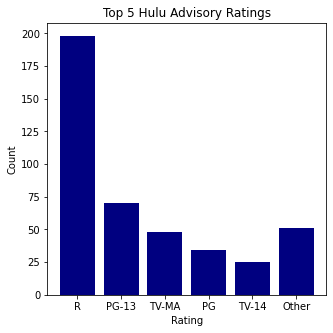

In [24]:
# discovering stream's offering/characteristics

# most frequent ratings (top 5 + other)

# by movie
adRatings = movies["Advisory Rating"].value_counts()
y_axis = [198,70,48,34,25,sum(adRatings[5:])]
x_axis = ['R','PG-13','TV-MA','PG','TV-14','Other']


plt.figure(figsize = (5,5))

plt.bar(x_axis, y_axis, color = 'navy')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Top 5 Hulu Advisory Ratings")

plt.savefig('adv_ratings_movies.png')

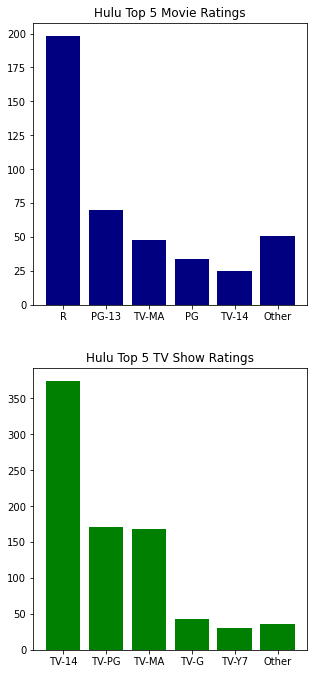

In [25]:
# by movie

adRatings = movies["Advisory Rating"].value_counts()
y_axis = [198,70,48,34,25,sum(adRatings[5:])]
x_axis = ['R','PG-13','TV-MA','PG','TV-14','Other']


# plt.figure(figsize = (5,5))

# plt.bar(x_axis, y_axis, color = 'navy')
# plt.xlabel("Rating")
# plt.ylabel("Count")
# plt.title("Most Frequent Movie Advisory Ratings on Hulu")

# plt.savefig('adv_ratings_movies.png')

# by tv show
adRat_tv = tv_show["Advisory Rating"].value_counts()

adratTV_y = [374, 171, 168, 43, 30, 36]
adratTV_x = ['TV-14','TV-PG','TV-MA','TV-G','TV-Y7','Other']

# plt.figure(figsize = (5,5))

# plt.bar(adratTV_x, adratTV_y, color = 'green')
# plt.xlabel("Rating")
# plt.ylabel("Count")
# plt.title("Most Frequent TV Advisory Ratings on Hulu")

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].bar(x_axis, y_axis, color = 'navy')
axs[1].bar(adratTV_x, adratTV_y, color = 'green')

axs[0].set_title("Hulu Top 5 Movie Ratings")
axs[1].set_title("Hulu Top 5 TV Show Ratings")

fig.tight_layout(pad = 3)

fig

plt.savefig('adv_ratings_tv.png')

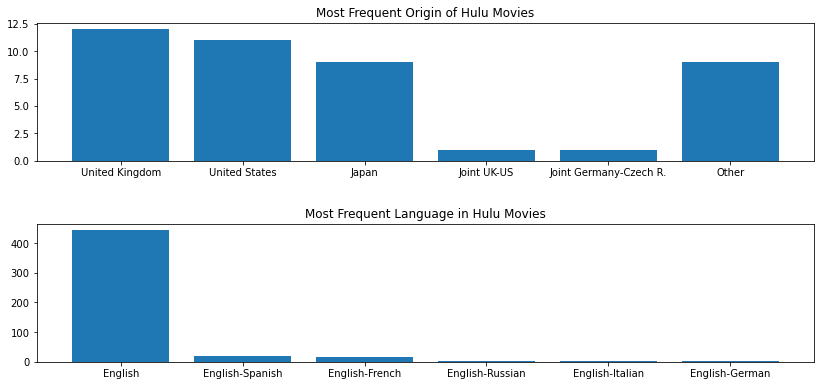

In [26]:
# double-bar chart by country and language

# by movie
ct_mov = movies["Country"].value_counts()
lang_mov = movies["Language"].value_counts()

ctmov_y = [12, 11, 9, 1, 1, sum(ct_mov[6:])]
ctmov_x = ['United Kingdom','United States','Japan','Joint UK-US','Joint Germany-Czech R.','Other']

langmov_y = [443,19,15,4,4,4]
langmov_x = ['English','English-Spanish','English-French','English-Russian','English-Italian','English-German']


fig, axs = plt.subplots(2,figsize=(12,6))
axs[0].bar(ctmov_x, ctmov_y)
axs[1].bar(langmov_x, langmov_y)

axs[0].set_title("Most Frequent Origin of Hulu Movies")
axs[1].set_title("Most Frequent Language in Hulu Movies")

fig.tight_layout(pad = 3)

In [27]:
# repeat the above for tv shows
ct_tv = tv_show["Country"].value_counts()
lang_tv = tv_show["Language"].value_counts()

cttv_y = [446, 111, 49, 13, 9, sum(ct_mov[6:])]
cttv_x = ['United States','Japan','United Kingdom','Canada','Joint US-Canada','Other']

# fig, axs = plt.subplots(2,figsize=(12,6))
# axs[0].bar(ctmov_x, ctmov_y)
# axs[1].bar(langmov_x, langmov_y)

# axs[0].set_title("Most Frequent Origin of Hulu Movies")
# axs[1].set_title("Most Frequent Language in Hulu Movies")

# fig.tight_layout(pad = 3)

# lang_tv

/var/folders/21/c38b7fjj2vd3z7p6w475vgz80000gn/T/ipykernel_28441/479726814.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad = 20)


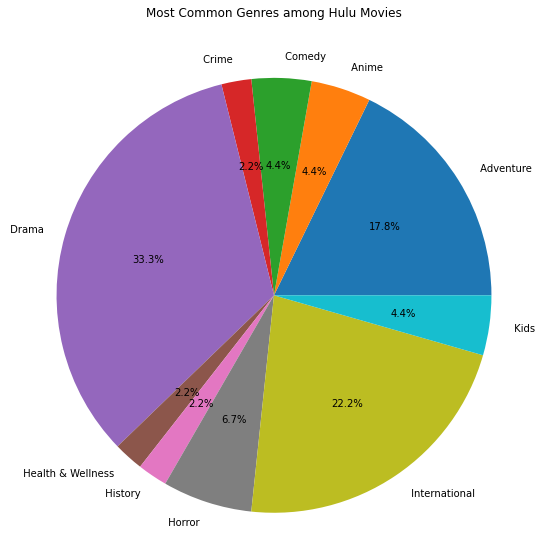

In [28]:
# genre niche of movies 
gen_mov_val = []
genmov_lab = []

sorted_cat_mov = sorted(cat_count.items())

for element in sorted_cat_mov[0:10]:
    gen_mov_val.append(element[1])
    genmov_lab.append(element[0])

plt.pie(gen_mov_val, labels = genmov_lab, autopct = "%1.1f%%", radius = 2.5)

fig.tight_layout(pad = 20)

plt.title('Most Common Genres among Hulu Movies', pad = 170)

plt.savefig('pc_hulu.png')

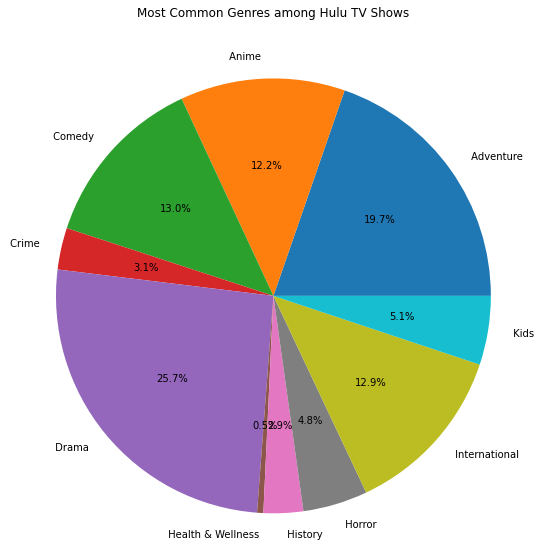

In [29]:
# genre niche of tv shows
gen_tv_val = []
gentv_lab = []

sorted_cat_tv = sorted(cat_count_tv.items())

for element in sorted_cat_tv[0:10]:
    gen_tv_val.append(element[1])
    gentv_lab.append(element[0])

plt.pie(gen_tv_val, labels = gentv_lab, autopct = "%1.1f%%", radius = 2.5)

plt.title('Most Common Genres among Hulu TV Shows', pad = 170)

plt.savefig('pc_hulu.png')

Text(0.5, 1.0, 'Most Common Advisory Age Ratings for Hulu Movies')

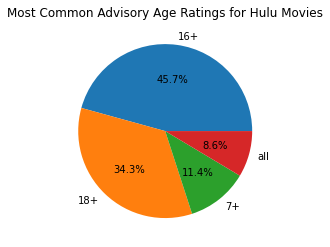

In [30]:
# count % of age advisory rating for movies and tv shows
ratage_mov = movies["Advisory Age"].value_counts()

ratage_count = [16, 12, 4, 3]
ratage_lab = ['16+','18+','7+','all']

plt.pie(ratage_count, labels = ratage_lab, autopct = "%1.1f%%", radius = 1)

plt.title('Most Common Advisory Age Ratings for Hulu Movies')

Text(0.5, 1.0, 'Most Common Advisory Age Ratings for Hulu TV Shows')

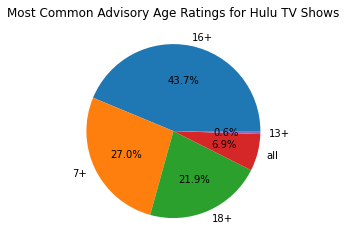

In [31]:
ratage_tv = tv_show["Advisory Age"].value_counts()
ratage_tv

ratage_count_tv = [318, 196, 159, 50, 4]
ratage_lab_tv = ['16+','7+','18+','all','13+']

plt.pie(ratage_count_tv, labels = ratage_lab_tv, autopct = "%1.1f%%", radius = 1)

plt.title('Most Common Advisory Age Ratings for Hulu TV Shows')

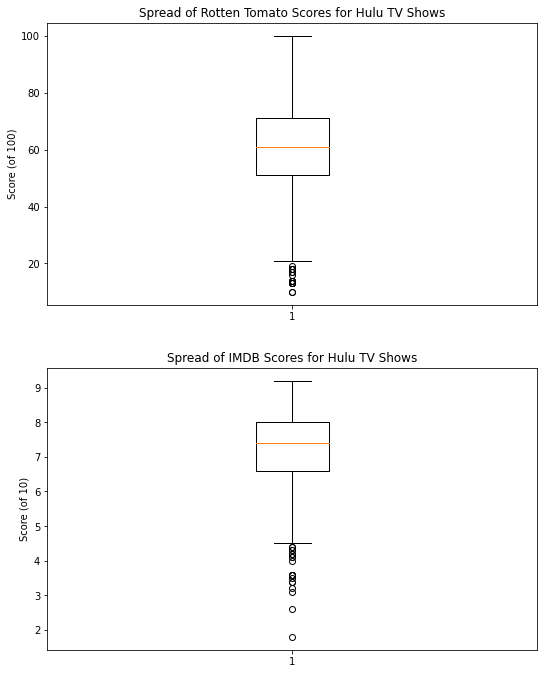

In [32]:
# box plt for critical reception

# for tv shows

fig, axs = plt.subplots(2,figsize=(8,10))
axs[0].boxplot(rttv_nn)
axs[1].boxplot(imdbtv_nn)

axs[0].set_title("Spread of Rotten Tomato Scores for Hulu TV Shows")
axs[1].set_title("Spread of IMDB Scores for Hulu TV Shows")

fig.tight_layout(pad = 3)

axs[0].set_ylabel('Score (of 100)')
axs[1].set_ylabel('Score (of 10)')

fig.savefig('RT and IMDB Scores for Hulu')

[73.0, 69.0, 66.0, 59.0, 55.0, 82.0, 78.0, 76.0, 72.0, 72.0, 70.0, 70.0, 69.0, 69.0, 68.0, 66.0, 65.0, 64.0, 63.0, 63.0, 58.0, 58.0, 57.0, 56.0, 56.0, 54.0, 54.0, 53.0, 52.0, 51.0, 51.0, 51.0, 51.0, 51.0, 50.0, 49.0, 49.0, 48.0, 46.0, 46.0, 46.0, 45.0, 45.0, 41.0, 41.0, 41.0, 40.0, 37.0, 35.0, 34.0, 31.0, 13.0, 85.0, 63.0, 10.0, 47.0, 46.0]


/var/folders/21/c38b7fjj2vd3z7p6w475vgz80000gn/T/ipykernel_28441/1569194091.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Rotten Tomatoes','IMDB'])


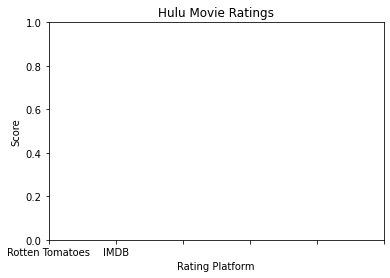

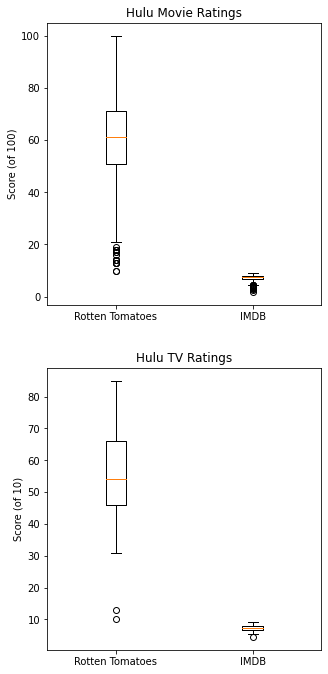

In [33]:
# for movies
# print(rt_nn)

# rt_nn = [x/10 for x in rt_nn]
print(rt_nn)
# rttv_nn = [x/10 for x in rttv_nn]

###
fig, ax1 = plt.subplots()
# ax1.boxplot([rt_nn, imdb_nn])
ax1.set_title("Hulu Movie Ratings")
ax1.set_xlabel('Rating Platform')
ax1.set_ylabel('Score')
ax1.set_xticklabels(['Rotten Tomatoes','IMDB'])
# # axs[1].set_title("Spread of IMDB Scores for Hulu Movies")

# fig.tight_layout(pad = 3)

# ax1.set_ylabel('Score (of 100)')
# # axs[1].set_ylabel('Score (of 10)')

# fig.savefig('RT and IMDB Scores (Movies) for Hulu')

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].boxplot([rttv_nn, imdbtv_nn])
axs[1].boxplot([rt_nn,imdb_nn])

axs[0].set_title("Hulu Movie Ratings")
axs[1].set_title("Hulu TV Ratings")
axs[0].set_xticklabels(['Rotten Tomatoes','IMDB'])
axs[1].set_xticklabels(['Rotten Tomatoes','IMDB'])

fig.tight_layout(pad = 3)

axs[0].set_ylabel('Score (of 100)')
axs[1].set_ylabel('Score (of 10)')

fig.savefig('RT and IMDB Scores for Hulu')


In [34]:
hulu_merge

,Title,Type,Director,Country,Rotten Tomatoes Rating,IMDB Rating,Advisory Age,Netflix,Hulu,Disney+,Year,Genre,Language,Runtime,Date Added,Advisory Rating
0,Attack on Titan,TV Show,NaN,Japan,95/100,9.0/10,18+,1.0,1.0,0.0,2013.0,"Action, Anime, International",NaN,NaN,"December 6, 2020",TV-MA
1,Community,TV Show,NaN,United States,90/100,8.5/10,7+,1.0,1.0,0.0,2009.0,"Comedy, Sitcom",NaN,NaN,"August 15, 2016",TV-14
2,Shameless,NaN,NaN,NaN,90/100,8.5/10,18+,1.0,1.0,0.0,2011.0,NaN,NaN,NaN,NaN,NaN
3,Fullmetal Alchemist: Brotherhood,TV Show,NaN,Japan,88/100,9.1/10,16+,1.0,1.0,0.0,2009.0,"Action, Adventure, Anime",NaN,NaN,"January 31, 2020",TV-14
4,Grey's Anatomy,NaN,NaN,NaN,87/100,7.5/10,16+,1.0,1.0,0.0,2005.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,Michael Smerconish: Things I Wish I Knew Befor...,TV Show,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"June 15, 2021",NaN
2664,Alien Contact,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,English,75.0,NaN,NaN
2665,Legend of Heroes: Trails in the Sky,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adventure,Japanese,NaN,NaN,NaN
2666,The Confessions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Drama,Mystery,Thriller","Italian,English,French,German",108.0,NaN,NaN


Text(0, 0.5, 'Count')

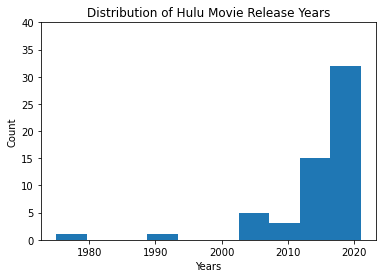

In [70]:
# graphing the date added and release year of movies

date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)

split_date = []
for date in date_add:
    split_date.append(date.split(','))
    
year_added = [int(date[1]) for date in split_date]
year_added_occ = collections.Counter(year_added)
year_added_count = [float(x) for x in year_added_occ.values()]
year_added_keys = [x for x in year_added_occ.keys()]

year_rel = [float(x) for x in movies['Year'] if x != "NaN"]
year_rel_occ = collections.Counter(year_rel)
yr_rel_occ = sorted(year_rel_occ.items(), key=lambda pair: pair[0], reverse=False)
year_rel_count = [float(x[1]) for x in yr_rel_occ]
year_rel_keys = [x[0] for x in yr_rel_occ]
year_rel_keys = [float(x) for x in year_rel_keys]

# fig, axs = plt.subplots(2,figsize=(12,6))
plt.hist(year_rel)
plt.ylim(0,40)

# plt.figure(figsize = (20,3))

# axs[0].bar(year_rel_keys, year_rel_count)
# axs[1].bar(year_added_keys, year_added_count)

# axs[0].set_title("Number of Movies Released Over the Years")
# axs[1].set_title("Number of Movies Added Over the Years")

# fig.tight_layout(pad = 3)

plt.title('Distribution of Hulu Movie Release Years')
plt.xlabel('Years')
plt.ylabel('Count')

Text(0.5, 0, 'Year')

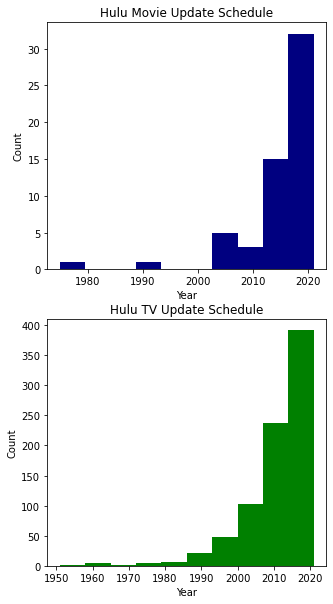

In [72]:
date_add_tv = [x for x in tv_show['Date Added']]
date_add_tv = set(date_add_tv)
date_add_tv = list(date_add_tv)

split_date_tv = []
for date in date_add_tv:
    if str(date) != 'NaN':
        date.strip()
        split_date_tv.append(str(date.split(',')))

# year_added = [date[1] for date in split_date]
# year_added_occ_tv = collections.Counter(year_added_tv)
# yr_added_occ = sorted(year_added_occ.items(), key=lambda pair: pair[0], reverse=False)
# year_added_count = [float(x) for x in year_added_occ.values()]
# year_added_keys = [float(x) for x in year_added_occ.keys()]

year_rel_tv = [float(x) for x in tv_show['Year'] if x != "NaN"]
year_rel_occ_tv = collections.Counter(year_rel_tv)
yr_rel_occ_tv = sorted(year_rel_occ_tv.items(), key=lambda pair: pair[0], reverse=False)

year_rel_counttv = [x[1] for x in yr_rel_occ_tv]
year_rel_keystv = [x[0] for x in yr_rel_occ_tv]

# plt.hist(year_rel_tv)
# plt.ylim(0,400)
# fig, axs = plt.subplots(2,figsize=(50,20))
# axs[0].bar(year_rel_keys, year_rel_count)
# axs[1].bar(year_added_keys, year_added_count)

# axs[0].set_title("Number of TV Shows Released Over the Years")
# axs[1].set_title("Number of TV Shows Added Over the Years")

# # fig.tight_layout(pad = 3)

# plt.title('Distribution of Hulu TV Shows Release Years')
# plt.xlabel('Years')
# plt.ylabel('Count')


###
fig, axs = plt.subplots(2,figsize=(5,10), )
axs[0].hist(year_rel, color = 'navy')
axs[1].hist(year_rel_tv, color = 'green')

axs[0].set_title("Hulu Movie Update Schedule")
axs[1].set_title("Hulu TV Update Schedule")

# # fig.tight_layout(pad = 3)

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')


axs[0].set_xlabel('Year')
axs[1].set_xlabel('Year')
# fig.ylabel('Count')

# fig.savefig('RT and IMDB Scores for Hulu')

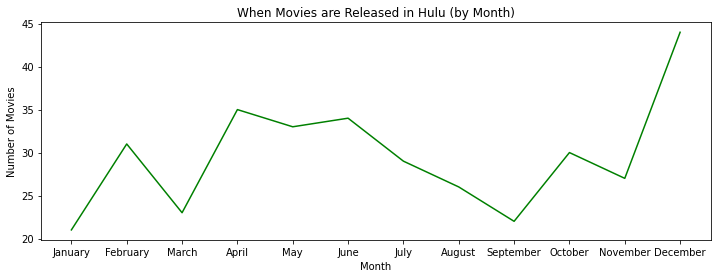

In [68]:
date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)


split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count = []
for month in months:
    count.append(month_added_occ.get(month))

plt.figure(figsize=(12,4))
plt.plot(months, count, color = 'green')

plt.title("When Movies are Released in Hulu (by Month)")
plt.xlabel("Month")
plt.ylabel("Number of Movies")

plt.savefig('Month_Rel_Count.png')


Text(0, 0.5, 'Count')

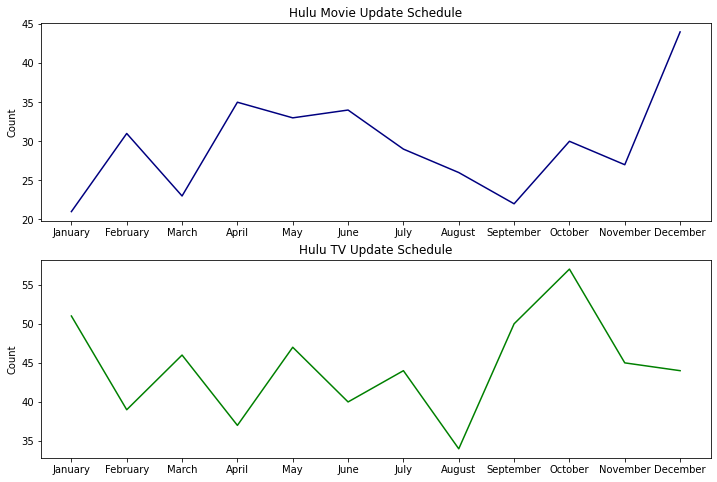

In [69]:
date_add = [x for x in tv_show['Date Added']]
date_add = set(date_add)
date_add = list(date_add)

split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count_tv = []
for month in months:
    count_tv.append(month_added_occ.get(month))

# plt.figure(figsize=(12,4))
# # plt.plot(months, count_tv, color='green')

# plt.title("When TV Shows are Released in Hulu (by Month)")
# plt.xlabel("Month")
# plt.ylabel("Number of Shows")

# plt.savefig('Month_Rel_Count_TV.png')

###
date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)


split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count = []
for month in months:
    count.append(month_added_occ.get(month))

# plt.figure(figsize=(12,4))
# plt.plot(months, count, color = 'green')

# plt.title("When Movies are Released in Hulu (by Month)")
# plt.xlabel("Month")
# plt.ylabel("Number of Movies")

# plt.savefig('Month_Rel_Count.png')

###

fig, axs = plt.subplots(2,figsize=(12,8), )
axs[0].plot(months, count, color = 'navy')
axs[1].plot(months,count_tv, color = 'green')

axs[0].set_title("Hulu Movie Update Schedule")
axs[1].set_title("Hulu TV Update Schedule")

# fig.tight_layout(pad = 3)

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')

# fig.ylabel('Count')

# fig.savefig('RT and IMDB Scores for Hulu')

In [39]:
hulu_merge.to_csv('hulu.csv')